In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
wego = pd.read_csv("../data/headway_data.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [224]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

# Cleaning

In [225]:
# drop trips where previous stop was cancelled

wego = wego.drop(wego[wego.PREV_SCHED_STOP_CANCELLED == 1.0].index)

In [226]:
wego = wego.drop(wego[(wego['ADJUSTED_EARLY_COUNT'] == 0.0) & (wego['ADJUSTED_LATE_COUNT'] == 0.0) & (wego['ADJUSTED_ONTIME_COUNT'] == 0.0)].index)

In [227]:
percentile1adh=wego['ADHERENCE'].quantile(0.001)
print(percentile1adh)

percentile99adh=wego['ADHERENCE'].quantile(0.999)
print(percentile99adh)

print('')

percentile1hdwy=wego['HDWY_DEV'].quantile(0.001)
print(percentile1hdwy)

percentile99hdwy=wego['HDWY_DEV'].quantile(0.999)
print(percentile99hdwy)

-57.040499999999994
9.466666

-21.624767162
56.43715000000084


In [228]:
wego = wego.drop(wego[wego.ADHERENCE < percentile1adh].index)
wego = wego.drop(wego[wego.ADHERENCE > percentile99adh].index)
wego = wego.drop(wego[wego.HDWY_DEV < percentile1hdwy].index)
wego = wego.drop(wego[wego.HDWY_DEV > percentile99hdwy].index)

In [229]:
# drop trips where scheduled headway was 0
wego = wego.drop(wego[wego.SCHEDULED_HDWY == 0].index)

In [230]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333927 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                333927 non-null  int64  
 1   SERVICE_ABBR               333927 non-null  int64  
 2   ADHERENCE_ID               333927 non-null  int64  
 3   DATE                       333927 non-null  object 
 4   ROUTE_ABBR                 333927 non-null  int64  
 5   BLOCK_ABBR                 333927 non-null  int64  
 6   OPERATOR                   333927 non-null  int64  
 7   TRIP_ID                    333927 non-null  int64  
 8   OVERLOAD_ID                333927 non-null  int64  
 9   ROUTE_DIRECTION_NAME       333927 non-null  object 
 10  TIME_POINT_ABBR            333927 non-null  object 
 11  ROUTE_STOP_SEQUENCE        333922 non-null  float64
 12  TRIP_EDGE                  333927 non-null  int64  
 13  LATITUDE                   333927 

# Q1

### What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

In [231]:
# wego_on_time = 
(wego
 [['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]
 .mean()*100
 ).reset_index()
# .sort_values('ADJUSTED_ONTIME_COUNT', ascending=False)
# wego[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()

,index,0
0,ADJUSTED_EARLY_COUNT,2.827564
1,ADJUSTED_LATE_COUNT,17.274734
2,ADJUSTED_ONTIME_COUNT,79.897702


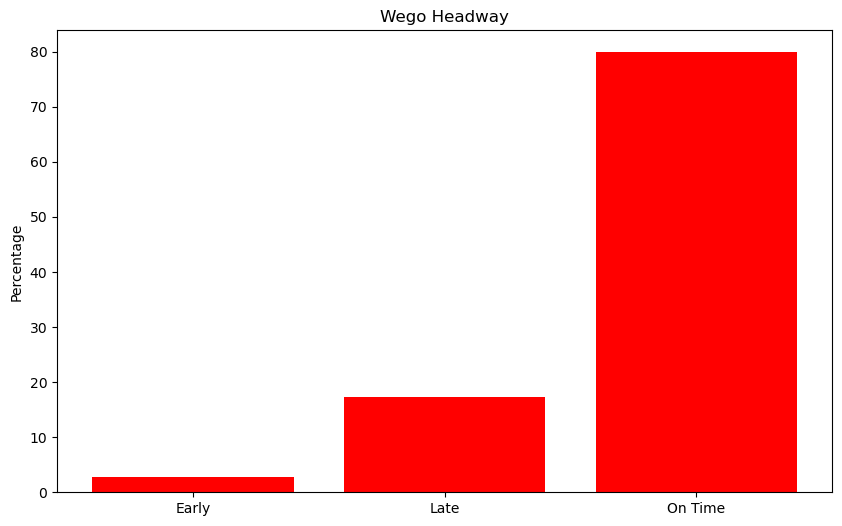

In [232]:
x=wego_on_time['index']
y=wego_on_time[0]

ax=['Early', 'Late', 'On Time']

plt.figure(figsize=(10,6))

plt.bar(ax, y, color='r')
plt.ylabel("Percentage")
plt.title("Wego Headway")
plt.show()

In [233]:
adjusted_counts

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,266800
1,0,1,0,57685
2,1,0,0,9442


In [234]:
# # Jessica's alternate
# # Percent of on-time stops - using only tagged rows
# round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
#                                                + wego['ADJUSTED_EARLY_COUNT'].sum() 
#                                                + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

In [235]:
# What percentage of trips were on time? We removed trips that had zeros in all adjusted columns.

print(str(round(((adjusted_counts['count'].iloc[0])/
(adjusted_counts['count'].iloc[0]+adjusted_counts['count'].iloc[1]+adjusted_counts['count'].iloc[2]))*100,2))+'% of trips were on time.')
print(str(round(((adjusted_counts['count'].iloc[1])/
(adjusted_counts['count'].iloc[0]+adjusted_counts['count'].iloc[1]+adjusted_counts['count'].iloc[2]))*100,2))+'% of trips were early.')
print(str(round(((adjusted_counts['count'].iloc[2])/
(adjusted_counts['count'].iloc[0]+adjusted_counts['count'].iloc[1]+adjusted_counts['count'].iloc[2]))*100,2))+'% of trips were late.')

79.9% of trips were on time.
17.27% of trips were early.
2.83% of trips were late.


In [236]:
wego.agg({'ADHERENCE': ['min','max','mean']})

,ADHERENCE
min,-56.800000
max,9.466666
mean,-3.085795


In [237]:
wego.agg({'HDWY_DEV': ['min','max','mean']})

,HDWY_DEV
min,-21.600000
max,56.400000
mean,0.398935


In [238]:
#investigating some of the outliers
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
wego.nsmallest(10,'HDWY_DEV')

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
213059,120230907,1,100532979,2023-09-07,23,2312,2352,350503,0,FROM DOWNTOWN,DWMRT,6.0,0,36.244207,-86.760509,2023-09-08 00:35:00,2023-09-10 00:32:31,2023-09-09 00:35:33,-0.550000,30.0,8.400000,-21.600000,0,0,1,0,0.0,0,3.033333,NaN
34818,120230807,1,99620627,2023-08-07,23,2312,2751,350499,0,FROM DOWNTOWN,DWMRT,6.0,0,36.244207,-86.760509,2023-08-07 21:55:00,2023-08-07 21:58:18,2023-08-07 21:58:18,-3.300000,40.0,18.416666,-21.583334,0,0,1,0,0.0,0,0.000000,NaN
75152,120230814,1,99823898,2023-08-14,23,2312,2751,350503,0,FROM DOWNTOWN,DWMRT,6.0,0,36.244207,-86.760509,2023-08-15 00:35:00,2023-08-17 00:35:29,2023-08-16 00:35:29,-0.483333,30.0,8.416666,-21.583334,0,0,1,0,0.0,0,0.000000,NaN
262382,120230915,1,99981868,2023-09-15,52,5213,3064,352262,0,FROM DOWNTOWN,DCSCC,11.0,0,36.086817,-86.686874,2023-09-15 15:54:00,2023-09-15 16:00:05,2023-09-15 16:02:48,-8.800000,32.0,10.416666,-21.583334,0,1,0,0,0.0,0,2.716666,NaN
47780,120230809,1,99683041,2023-08-09,23,2312,2352,350503,0,FROM DOWNTOWN,DWMRT,6.0,0,36.244207,-86.760509,2023-08-10 00:35:00,2023-08-12 00:34:03,2023-08-11 00:34:03,0.950000,30.0,8.466666,-21.533334,0,0,1,0,0.0,0,0.000000,NaN
267741,120230916,2,100004403,2023-09-16,52,5211,2706,352197,0,TO DOWNTOWN,LINWAL,6.0,0,36.083418,-86.704722,2023-09-16 19:59:00,2023-09-16 19:59:20,2023-09-16 19:59:20,-0.333333,51.0,29.533333,-21.466667,0,0,1,0,0.0,0,0.000000,NaN
191375,120230902,2,100392781,2023-09-02,7,701,2164,353384,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-02 18:15:00,2023-09-02 18:21:40,2023-09-02 18:21:40,-6.666666,30.0,8.566666,-21.433334,0,1,0,0,0.0,0,0.000000,NaN
16308,120230803,1,99530202,2023-08-03,52,5211,624,347343,0,FROM DOWNTOWN,LINWAL,10.0,0,36.083421,-86.703471,2023-08-03 10:36:00,2023-08-03 10:39:04,2023-08-03 10:39:04,-3.066666,30.0,8.583333,-21.416667,0,0,1,0,0.0,0,0.000000,NaN
246919,120230913,1,100693917,2023-09-13,23,2312,2352,350499,0,FROM DOWNTOWN,DWMRT,6.0,0,36.244207,-86.760509,2023-09-13 21:55:00,2023-09-13 21:54:45,2023-09-13 21:57:26,-2.433333,40.0,18.600000,-21.400000,0,0,1,0,0.0,0,2.683333,NaN
70937,120230813,3,99799918,2023-08-13,23,2313,1904,350592,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-13 08:29:00,2023-08-13 08:27:01,2023-08-13 08:30:10,-1.166666,25.0,3.650000,-21.350000,0,0,1,0,0.0,0,3.150000,6.0


C:\Users\tayjy\AppData\Local\Temp\ipykernel_9012\928343750.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wego['HDWY_DEV'])
C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tayjy\AppData\Local\Temp\ipykernel_9012\928343750.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility

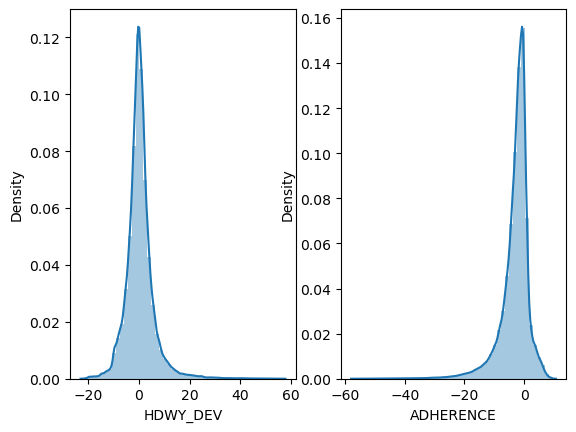

In [239]:
plt.subplot(1,2,1)
sns.distplot(wego['HDWY_DEV'])

plt.subplot(1,2,2)
sns.distplot(wego['ADHERENCE'])

plt.show()

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HDWY_DEV', ylabel='Count'>

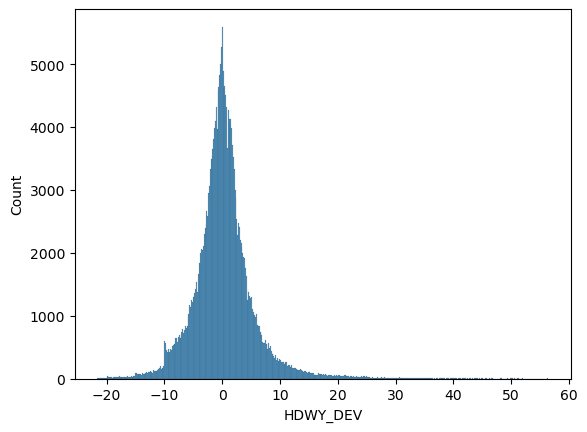

In [240]:
sns.histplot(data=wego, x="HDWY_DEV")

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='distance', ylabel='Count'>

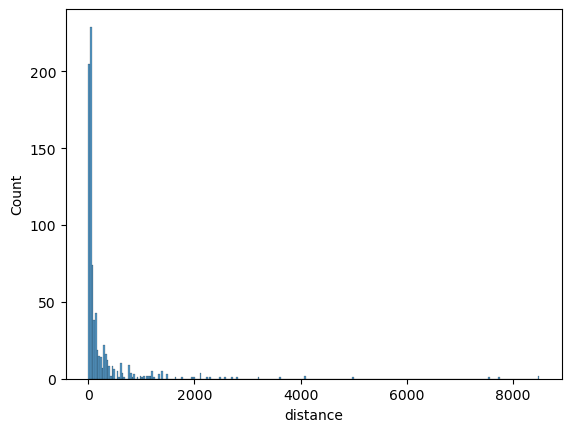

In [241]:
planets = sns.load_dataset("planets")
sns.histplot(data=planets, x="distance")

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HDWY_DEV', ylabel='Count'>

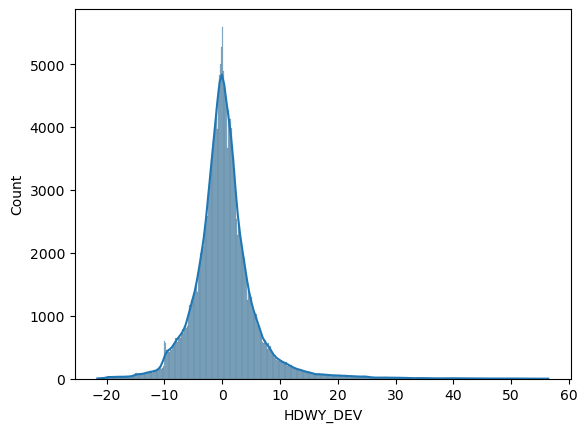

In [242]:
sns.histplot(data=wego, x="HDWY_DEV", kde=True)

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ADHERENCE', ylabel='Count'>

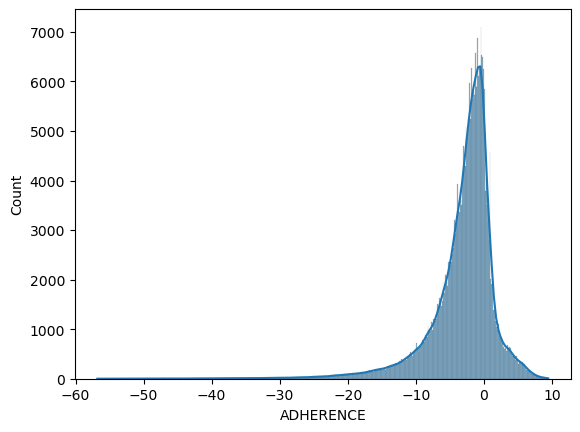

In [243]:
sns.histplot(data=wego, x="ADHERENCE", kde=True)

<Axes: ylabel='HDWY_DEV'>

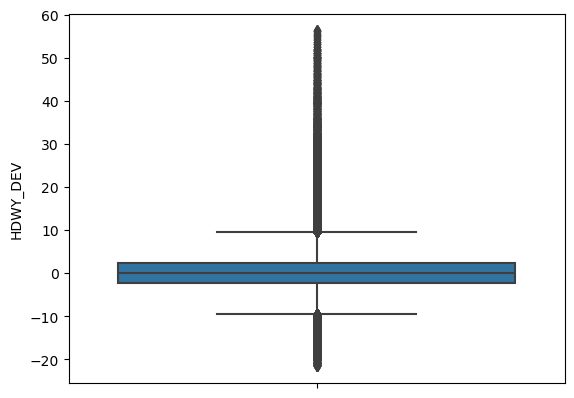

In [244]:
sns.boxplot( y=wego['HDWY_DEV'])

<Axes: ylabel='ADHERENCE'>

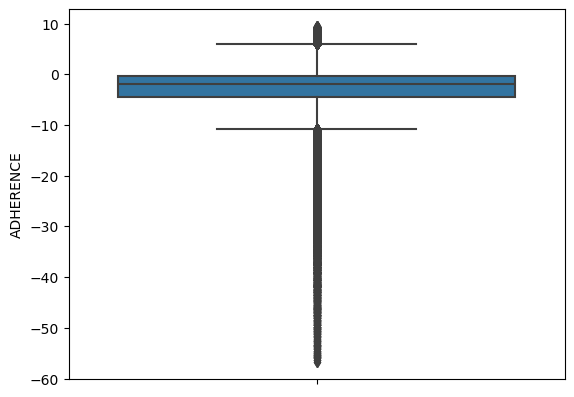

In [245]:
sns.boxplot( y=wego['ADHERENCE'])

In [246]:
# create headway deviation % column and bunching/gapping, acceptable range for each trip, is within range 1/0

In [247]:
# del wego['BUNCHING_OR_GAPPING']

In [248]:
wego['HEADWAY_DEVIATION_PERCENTAGE'] = round((wego['HDWY_DEV']/wego['SCHEDULED_HDWY'])*100,2)



wego['HEADWAY_IS_BUNCHING'] = np.where(wego['HEADWAY_DEVIATION_PERCENTAGE'] 
                       < -50, '1','0')
wego['HEADWAY_IS_ACCEPTABLE'] = np.where((wego['HEADWAY_DEVIATION_PERCENTAGE'] 
                       >= -50)&(wego['HEADWAY_DEVIATION_PERCENTAGE'] 
                       <= 50), '1','0')
wego['HEADWAY_IS_GAPPING'] = np.where(wego['HEADWAY_DEVIATION_PERCENTAGE'] 
                       > 50, '1','0')
wego['HEADWAY_IS_UNKNOWN'] = np.where(wego['HEADWAY_DEVIATION_PERCENTAGE'].isna()
                       == True, '1','0')

In [249]:
wego.head(500)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HEADWAY_DEVIATION_PERCENTAGE,HEADWAY_IS_BUNCHING,HEADWAY_IS_ACCEPTABLE,HEADWAY_IS_GAPPING,HEADWAY_IS_UNKNOWN
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN,0,0,0,1
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0,1
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0,1
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,0,0,0,1
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN,0,0,0,1
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0,1
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,0,0,0,1
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,7.62,0,1,0,0
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,5.62,0,1,0,0
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,-3.22,0,1,0,0


In [250]:
wego['HEADWAY_IS_BUNCHING'] = wego['HEADWAY_IS_BUNCHING'].astype(int)
wego['HEADWAY_IS_ACCEPTABLE'] = wego['HEADWAY_IS_ACCEPTABLE'].astype(int)
wego['HEADWAY_IS_GAPPING'] = wego['HEADWAY_IS_GAPPING'].astype(int)
wego['HEADWAY_IS_UNKNOWN'] = wego['HEADWAY_IS_UNKNOWN'].astype(int)

In [251]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333927 entries, 0 to 350328
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CALENDAR_ID                   333927 non-null  int64  
 1   SERVICE_ABBR                  333927 non-null  int64  
 2   ADHERENCE_ID                  333927 non-null  int64  
 3   DATE                          333927 non-null  object 
 4   ROUTE_ABBR                    333927 non-null  int64  
 5   BLOCK_ABBR                    333927 non-null  int64  
 6   OPERATOR                      333927 non-null  int64  
 7   TRIP_ID                       333927 non-null  int64  
 8   OVERLOAD_ID                   333927 non-null  int64  
 9   ROUTE_DIRECTION_NAME          333927 non-null  object 
 10  TIME_POINT_ABBR               333927 non-null  object 
 11  ROUTE_STOP_SEQUENCE           333922 non-null  float64
 12  TRIP_EDGE                     333927 non-null  in

In [252]:
wego[['HEADWAY_IS_BUNCHING','HEADWAY_IS_ACCEPTABLE','HEADWAY_IS_GAPPING','HEADWAY_IS_UNKNOWN']].value_counts().sort_values().reset_index()

,HEADWAY_IS_BUNCHING,HEADWAY_IS_ACCEPTABLE,HEADWAY_IS_GAPPING,HEADWAY_IS_UNKNOWN,count
0,1,0,0,0,17243
1,0,0,1,0,20562
2,0,0,0,1,72640
3,0,1,0,0,223482


In [253]:
# wego[wego['SCHEDULED_HDWY']==1e-10]

In [254]:
# wego['SCHEDULED_HDWY'].value_counts().reset_index().sort_values(by='SCHEDULED_HDWY')

# Q2

### How does direction of travel, route, or location affect the headway and on-time performance?

In [255]:
total = wego['ROUTE_DIRECTION_NAME'].value_counts().reset_index()
total

,ROUTE_DIRECTION_NAME,count
0,FROM DOWNTOWN,176992
1,TO DOWNTOWN,156935


In [256]:
# 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
on_time = wego[['ROUTE_DIRECTION_NAME', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()
on_time

,ROUTE_DIRECTION_NAME,ADJUSTED_ONTIME_COUNT,count
0,TO DOWNTOWN,1,133661
1,FROM DOWNTOWN,1,133139
2,FROM DOWNTOWN,0,43853
3,TO DOWNTOWN,0,23274


In [257]:
early = wego[['ROUTE_DIRECTION_NAME', 'ADJUSTED_EARLY_COUNT']].value_counts().reset_index()
early

,ROUTE_DIRECTION_NAME,ADJUSTED_EARLY_COUNT,count
0,FROM DOWNTOWN,0,171880
1,TO DOWNTOWN,0,152605
2,FROM DOWNTOWN,1,5112
3,TO DOWNTOWN,1,4330


In [258]:
late = wego[['ROUTE_DIRECTION_NAME', 'ADJUSTED_LATE_COUNT']].value_counts().reset_index()
late

,ROUTE_DIRECTION_NAME,ADJUSTED_LATE_COUNT,count
0,FROM DOWNTOWN,0,138251
1,TO DOWNTOWN,0,137991
2,FROM DOWNTOWN,1,38741
3,TO DOWNTOWN,1,18944


In [259]:
print(str(round(((on_time['count'].iloc[0])/
                 (total['count'].iloc[1]))*100,2))+'% of (to downtown) trips were on time.')
print(str(round(((on_time['count'].iloc[1])/
                 (total['count'].iloc[0]))*100,2))+'% of (from downtown) trips were on time.')
print('')
print(str(round(((early['count'].iloc[3])/
                 (total['count'].iloc[1]))*100,2))+'% of (to downtown) trips were early.')
print(str(round(((early['count'].iloc[2])/
                 (total['count'].iloc[0]))*100,2))+'% of (from downtown) trips were early.')
print('')
print(str(round(((late['count'].iloc[3])/
                 (total['count'].iloc[1]))*100,2))+'% of (to downtown) trips were late.')
print(str(round(((late['count'].iloc[2])/
                 (total['count'].iloc[0]))*100,2))+'% of (from downtown) trips were late.')

85.17% of (to downtown) trips were on time.
75.22% of (from downtown) trips were on time.

2.76% of (to downtown) trips were early.
2.89% of (from downtown) trips were early.

12.07% of (to downtown) trips were late.
21.89% of (from downtown) trips were late.


In [260]:
# initialize list of lists
data = [['To Downtown', 85.17, 'On Time'],
        ['To Downtown', 2.76, 'Early'],
        ['To Downtown', 12.07, 'Late'],
        ['From Downtown', 75.22, 'On Time'],
        ['From Downtown', 2.89, 'Early'],
        ['From Downtown', 21.89, 'Late']]
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Direction of Travel', 'Percent', 'On Time Performance'])
 
# print dataframe.
df

,Direction of Travel,Percent,On Time Performance
0,To Downtown,85.17,On Time
1,To Downtown,2.76,Early
2,To Downtown,12.07,Late
3,From Downtown,75.22,On Time
4,From Downtown,2.89,Early
5,From Downtown,21.89,Late


<Axes: xlabel='On Time Performance', ylabel='Percent'>

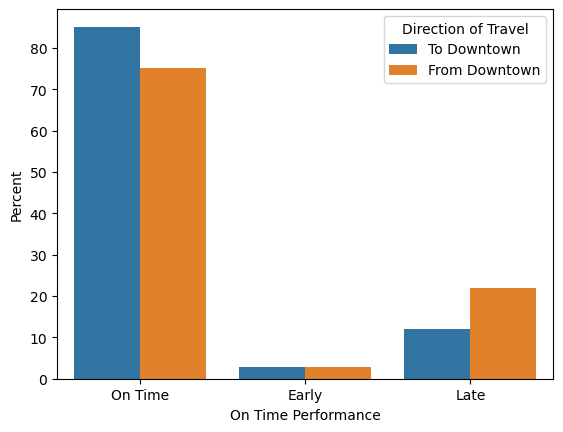

In [261]:
sns.barplot(df, x='On Time Performance', y='Percent', hue='Direction of Travel')

In [262]:


# wego.groupby('ROUTE_DIRECTION_NAME')['HEADWAY_DEVIATION_PERCENTAGE'].agg(['min', 'mean', 'max'])

In [263]:
# print(wego.groupby(by='ROUTE_DIRECTION_NAME').agg({'HEADWAY_DEVIATION_PERCENTAGE': ['min','max','mean']}))
# print('')
# print(wego.groupby(by='ROUTE_DIRECTION_NAME').agg({'ADHERENCE': ['min','max','mean']}))

In [264]:
# # wego.groupby(by='ROUTE_ABBR').agg({'ADHERENCE': ['mean']}).agg({'HDWY_DEV': ['mean']})
# round(wego.groupby(by='ROUTE_ABBR').agg(HeadwayDeviation=('HEADWAY_DEVIATION_PERCENTAGE', 'mean'), Bunching=('HEADWAY_IS_BUNCHING', 'mean')),2).reset_index()
# # print('')
# # wego.groupby(by='ROUTE_ABBR').agg({'ADHERENCE': ['mean']})
# # sns.barplot(df2, x='ROUTE_ABBR', y='HDWY_DEV')

In [265]:
# # initialize list of lists
# data2 = [['3', 0.54, 'Headway Deviation Percentage'],
#         ['3', -3.71, 'Adherence'],
#         ['7', 0.33, 'Headway Deviation Percentage'],
#         ['7', -3.48, 'Adherence'],
#         ['22', 0.57, 'Headway Deviation Percentage'],
#         ['22', -1.07, 'Adherence'],
#         ['23', 0.82, 'Headway Deviation Percentage'],
#         ['23', -1.64, 'Adherence'],
#         ['50', 0.17, 'Headway Deviation Percentage'],
#         ['50', -2.42, 'Adherence'],
#         ['52', 0.71, 'Headway Deviation Percentage'],
#         ['52', -3.73, 'Adherence'],
#         ['55', 0.19, 'Headway Deviation Percentage'],
#         ['55', -4.62, 'Adherence'],
#         ['56', 0.12, 'Headway Deviation Percentage'],
#         ['56', -2.65, 'Adherence']]
# # Create the pandas DataFrame
# df2 = pd.DataFrame(data2, columns=['Route', 'Mean', 'Metric'])
 
# # print dataframe.
# df2

In [266]:
# sns.barplot(df2, x='Route', y='Mean', hue='Metric')

In [267]:
# print(wego.groupby(by='ROUTE_ABBR').agg({'HEADWAY_DEVIATION_PERCENTAGE': ['min','max','mean']}))
# print('')
# print(wego.groupby(by='ROUTE_ABBR').agg({'ADHERENCE': ['min','max','mean']}))

In [268]:
# print(wego.groupby(by='TIME_POINT_ABBR').agg({'HEADWAY_DEVIATION_PERCENTAGE': ['min','max','mean']}))
# print('')
# print(wego.groupby(by='TIME_POINT_ABBR').agg({'ADHERENCE': ['min','max','mean']}))

In [269]:
(wego
#  .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .groupby(['ROUTE_ABBR'])
 [['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE', 'HEADWAY_IS_UNKNOWN']]
 .mean()*100
 ).reset_index().sort_values('HEADWAY_IS_ACCEPTABLE', ascending=False)

,ROUTE_ABBR,HEADWAY_IS_BUNCHING,HEADWAY_IS_GAPPING,HEADWAY_IS_ACCEPTABLE,HEADWAY_IS_UNKNOWN
4,50,2.389684,2.966994,75.750621,18.892701
0,3,4.664030,6.161675,69.438272,19.736023
7,56,6.134370,6.555776,69.192819,18.117034
5,52,5.810700,7.209877,67.637860,19.341564
3,23,1.552072,4.541154,65.432509,28.474264
2,22,1.173315,2.740530,62.039055,34.047100
1,7,2.493678,3.352350,60.836323,33.317650
6,55,10.749338,10.390915,60.652196,18.207550


In [270]:
(wego
#  .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .groupby(['ROUTE_ABBR'])
 [['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]
 .mean()*100
 ).reset_index().sort_values('ADJUSTED_ONTIME_COUNT', ascending=False)

,ROUTE_ABBR,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
2,22,2.535199,8.171304,89.293496
3,23,3.160398,8.049298,88.790304
4,50,2.791908,11.877440,85.330652
7,56,2.919008,14.838290,82.242702
1,7,2.205493,19.802388,77.992119
5,52,3.067901,19.971193,76.960905
0,3,2.988623,20.971469,76.039908
6,55,2.522360,27.457877,70.019764


In [271]:
(wego
#  .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .groupby(['TIME_POINT_ABBR'])
 [['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE', 'HEADWAY_IS_UNKNOWN']]
 .mean()*100
 ).reset_index().sort_values('HEADWAY_IS_ACCEPTABLE', ascending=False)

,TIME_POINT_ABBR,HEADWAY_IS_BUNCHING,HEADWAY_IS_GAPPING,HEADWAY_IS_ACCEPTABLE,HEADWAY_IS_UNKNOWN
2,28&CHARL,3.080671,3.682476,91.517409,1.719444
5,CH46,3.170277,3.744083,91.335533,1.750108
23,HLWD,3.118712,3.894797,91.261857,1.724634
8,CV23,2.803738,5.214682,90.329134,1.652445
10,DKTL,2.116807,6.350421,89.977047,1.555726
51,N1SP,2.345663,6.573012,89.508957,1.572368
4,BRCJ,2.041331,5.493952,89.440524,3.024194
26,LINWAL,2.662230,5.158070,89.303542,2.876159
24,HPKL,0.000000,0.897227,89.233279,9.869494
12,EDBC,0.944882,7.559055,89.094488,2.401575


In [272]:
(wego
#  .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .groupby(['TIME_POINT_ABBR'])
 [['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]
 .mean()*100
 ).reset_index().sort_values('ADJUSTED_ONTIME_COUNT', ascending=False)

,TIME_POINT_ABBR,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
40,MCC5_6,0.000000,0.862069,99.137931
1,25ACLARK,0.503990,1.595968,97.900042
35,MCC5_10,0.246575,4.136986,95.616438
33,MCC4_24,0.404654,4.312089,95.283257
44,MHSP,0.900225,7.951988,91.147787
29,MCC4_18,0.678593,9.006786,90.314621
43,MEIG,4.166667,5.555556,90.277778
55,WALM,1.812991,8.479657,89.707352
34,MCC5_1,0.612623,10.044166,89.343211
11,DWMRT,1.577335,9.548239,88.874426


# Q3

### How does time of day or day of week affect headway and on-time performance?

In [273]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333927 entries, 0 to 350328
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CALENDAR_ID                   333927 non-null  int64  
 1   SERVICE_ABBR                  333927 non-null  int64  
 2   ADHERENCE_ID                  333927 non-null  int64  
 3   DATE                          333927 non-null  object 
 4   ROUTE_ABBR                    333927 non-null  int64  
 5   BLOCK_ABBR                    333927 non-null  int64  
 6   OPERATOR                      333927 non-null  int64  
 7   TRIP_ID                       333927 non-null  int64  
 8   OVERLOAD_ID                   333927 non-null  int64  
 9   ROUTE_DIRECTION_NAME          333927 non-null  object 
 10  TIME_POINT_ABBR               333927 non-null  object 
 11  ROUTE_STOP_SEQUENCE           333922 non-null  float64
 12  TRIP_EDGE                     333927 non-null  in

In [274]:
wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'], format = 'mixed')

In [275]:
wego_day = (wego
 .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .groupby(['day'])
 [['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE', 'HEADWAY_IS_UNKNOWN']]
 .mean()*100
 ).reset_index().sort_values('HEADWAY_IS_ACCEPTABLE', ascending=False)
# .sort_values('mean', ascending=False)

# Averages for all days indicate a tendancy toward gapping - related to adherence
# The smallest average gapping values are occuring on Mondays and Saturdays
# The largest average gapping values occur on Thursdays and Fridays

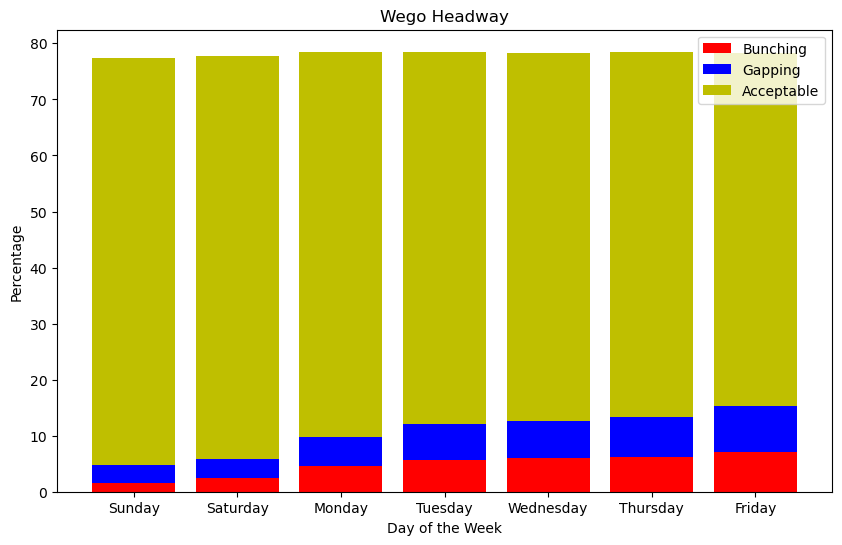

In [276]:
x=wego_day['day']
y1=wego_day['HEADWAY_IS_BUNCHING']
y2=wego_day['HEADWAY_IS_GAPPING']
y3=wego_day['HEADWAY_IS_ACCEPTABLE']
# y4=wego_day['HEADWAY_IS_UNKNOWN']

plt.figure(figsize=(10,6))

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
# plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Day of the Week")
plt.ylabel("Percentage")
plt.legend(["Bunching", "Gapping", "Acceptable", "Unknown"])
plt.title("Wego Headway")
plt.show()

In [277]:
# # Creating dataframe to look at headway deviation perc by day and hour
# dh = wego.assign(day = wego['SCHEDULED_TIME'].dt.day_name()).assign(hour = wego['SCHEDULED_TIME'].dt.hour).groupby(['day','hour'])['HEADWAY_DEVIATION_PERCENTAGE'].mean().reset_index()

# # Graphing this data with Seaborn

# # Defining the order of days of the week
# days_of_week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# # Creating the FacetGrid
# g = sns.FacetGrid(dh, 
#                   col="day", 
#                   col_order=days_of_week_order, 
#                   col_wrap=4)
# g.map_dataframe(sns.barplot, 
#                 x="hour", 
#                 y="HEADWAY_DEVIATION_PERCENTAGE", 
#                 palette='husl')

# # Fine Tuning
# g.fig.suptitle("Headway Deviation Percentage by Hour and Day", fontsize=16, y=1.05)
# g.set_axis_labels("Hour of Day", "Headway Deviation Percentage")
# g.set_titles("{col_name}")
# g.set_xticklabels(rotation=45)

# # Show the plot
# plt.show()

In [278]:
wego_hour = (wego
 .assign(hour = wego['SCHEDULED_TIME'].dt.hour)
 .groupby(['hour'])
 [['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE', 'HEADWAY_IS_UNKNOWN']]
 .mean()*100
).reset_index().sort_values('HEADWAY_IS_ACCEPTABLE', ascending=False)

# The largest average bunching values are occuring at 4am and 1am
# the largest average gapping values occur at 7am and 3pm

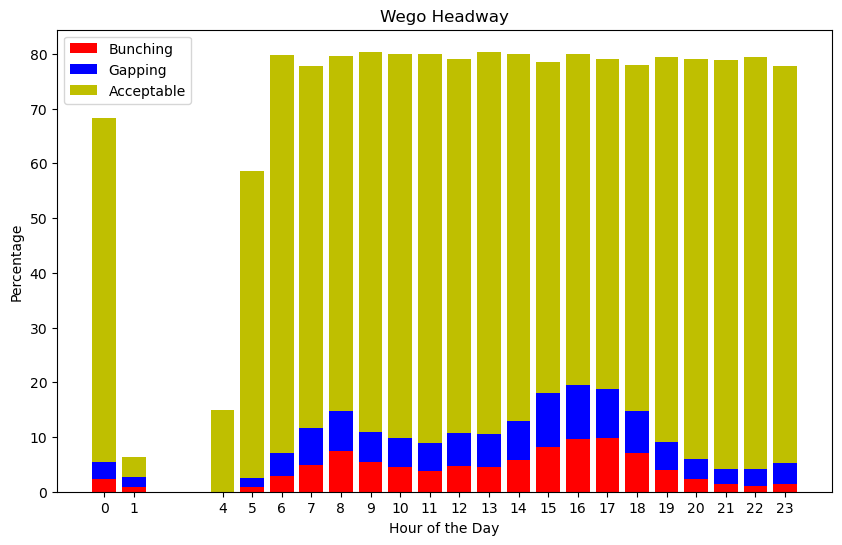

In [279]:
x=wego_hour['hour']
y1=wego_hour['HEADWAY_IS_BUNCHING']
y2=wego_hour['HEADWAY_IS_GAPPING']
y3=wego_hour['HEADWAY_IS_ACCEPTABLE']
# y4=wego_hour['HEADWAY_IS_UNKNOWN']

plt.figure(figsize=(10,6))

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
# plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Hour of the Day")
plt.ylabel("Percentage")
plt.legend(["Bunching", "Gapping", "Acceptable"])
plt.title("Wego Headway")
plt.xticks(x)
plt.show()

In [280]:
(wego
 .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .assign(hour = wego['SCHEDULED_TIME'].dt.hour)
 .assign(month = wego['SCHEDULED_TIME'].dt.month)
 .groupby(['day'])
 ['ADHERENCE']
 .agg(['mean', 'std', 'median','max', 'sum'])
).sort_values('max', ascending=False).sort_values('mean').reset_index()

# Averages for all days indicate a tendancy toward late departures - related to gapping
# The smallest average late values are occuring on Mondays and Sundays
# the largest average late values occur on Fridays and Saturdays

,day,mean,std,median,max,sum
0,Friday,-3.692639,5.637897,-2.350000,9.266666,-203113.604928
1,Saturday,-3.347112,5.445192,-2.166666,9.416666,-119414.908930
2,Thursday,-3.338955,5.439898,-2.083333,9.300000,-185305.305113
3,Wednesday,-3.186093,5.094743,-2.050000,9.466666,-179383.405147
4,Tuesday,-2.935254,4.519801,-2.000000,9.433333,-164383.005180
5,Sunday,-2.423951,4.781963,-1.550000,9.466666,-69203.794716
6,Monday,-2.337847,4.058020,-1.650000,9.466666,-109626.341186


In [281]:
(wego
 .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .assign(hour = wego['SCHEDULED_TIME'].dt.hour)
 .assign(month = wego['SCHEDULED_TIME'].dt.month)
 .groupby(['hour'])
 ['ADHERENCE']
 .agg(['mean', 'std', 'median','max', 'sum'])
).sort_values('max', ascending=False).sort_values('mean')

# Averages for all hours indicate a tendancy toward late departures - related to gapping
# The smallest average late values are occuring at 4am and 5am
# the largest average late values occur at 4pm and 5pm

,mean,std,median,max,sum
hour,,,,,
17,-4.745297,7.023495,-2.716666,9.333333,-97226.395385
16,-4.634179,6.821733,-2.750000,9.100000,-99491.195271
18,-4.114649,5.930042,-2.616666,9.100000,-69780.329375
15,-4.056079,5.848044,-2.650000,9.233333,-87355.778520
19,-4.015721,5.380919,-2.833333,8.516666,-53421.130116
8,-3.669963,4.979157,-2.400000,9.383333,-74636.028716
1,-3.618168,6.557112,-1.650000,6.316666,-401.616657
23,-3.409196,6.456656,-1.633333,9.300000,-30682.764864
20,-3.357250,4.669901,-2.450000,9.200000,-40723.447174
